# Computer Lab 1: Part 2.  Naive Models

In this practical will apply our knowledge in

* Creating baseline naive forecasts
* Performing a train-test split
* Using forecast error metrics MAE and MAPE to select the best method 

# Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Install forecast-tools

In [39]:
#Note this is only need if you are running in colab or if you have not installed
#uncomment the line below to install.
#!pip install forecast-tools

# forecast-tools imports

In [2]:
#baseline forecast methods
from forecast_tools.baseline import (Naive1, 
                               SNaive,
                               Drift,
                               Average,
                               baseline_estimators)

from forecast_tools.metrics import (mean_absolute_percentage_error,
                                    mean_absolute_error)

# Helper functions

In [3]:
def preds_as_series(data, preds):
    '''
    Helper function for plotting predictions.
    Converts a numpy array of predictions to a 
    pandas.DataFrame with datetimeindex
    
    Parameters
    -----
    data - arraylike - the training data
    preds - numpy.array, vector of predictions 
    
    Returns:
    -------
    pandas.DataFrame
    '''
    start = pd.date_range(start=data.index.max(), periods=2, 
                          freq=data.index.freq).max()
    idx = pd.date_range(start=start, periods=len(preds), freq=data.index.freq)
    return pd.DataFrame(preds, index=idx)

## Exercise 1: Using Naive1 to forecast monthly outpatient appointments.

**Step 1: Import monthly outpatient appointments time series**  

This can be found in **"data/out_appoints_mth.csv"**

* Hint: this is monthly data.  You can use the monthly Start ('MS') frequency

In [4]:
# your code here ...

In [37]:
appoints = pd.read_csv('../../../hpdm097-data/forecasting/out_appoints_mth.csv', 
                   index_col='date', parse_dates=True, dayfirst=True)
appoints.index.freq = 'MS'

In [38]:
appoints.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2014-04-01 to 2018-04-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   out_apts  49 non-null     int64
dtypes: int64(1)
memory usage: 784.0 bytes


**Step 2 Plot the data**

In [7]:
# your code here ...

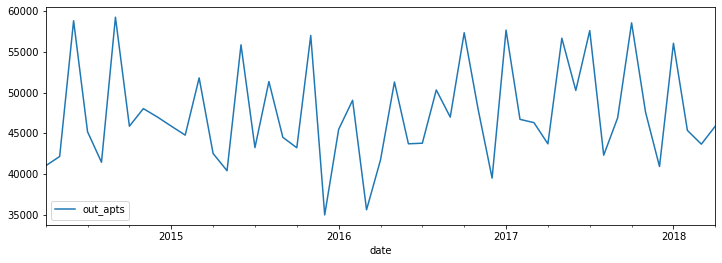

In [8]:
appoints.plot(figsize=(12,4))

**Step 3: Create and fit Naive1 forecast model**

* Hint: you want to fit `appoints['out_apts']`

In [9]:
# your code here ...

In [10]:
nf1 = Naive1()
nf1.fit(appoints['out_apts'])

**Step 4: Plot the Naive1 fitted values**

All the baseline models have fitted values.  These are the in-sample prediction i.e. the predictions of the training data.

Once you have created and fitted a Naive1 model you can access the fitted values using the `.fittedvalues` property.  This returns a `DataFrame`.

Plot the fitted values against the observed data.

In [11]:
# your code here ...

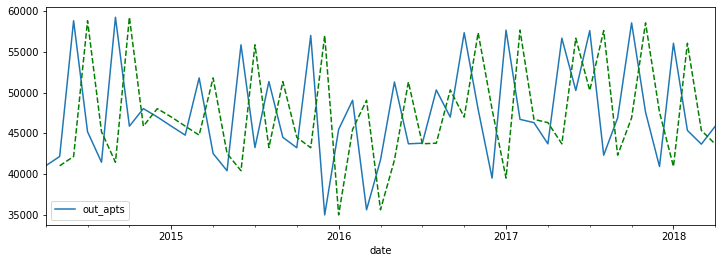

In [12]:
ax = appoints.plot(figsize=(12,4))
nf1.fittedvalues.plot(ax=ax, color='green', linestyle='--')

**Step 5: Forecast the next 6 months**

After you have created a forecast plot the predictions.  

* Hint: use the `pred_as_series()` method to plot the predictions.  See the lecture notes for exampes of how to use it.

In [13]:
# your code here ...

In [14]:
preds = nf1.predict(horizon=6)

In [15]:
preds = preds_as_series(appoints, preds)

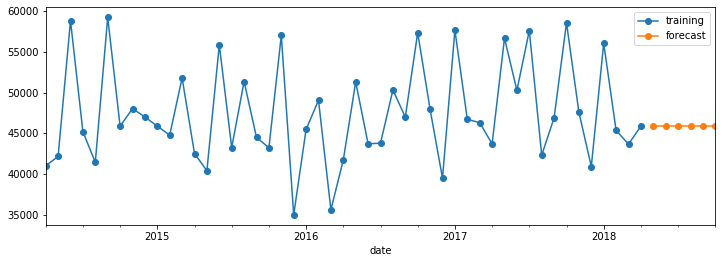

In [16]:
ax = appoints.plot(figsize=(12,4), marker='o')
preds.plot(ax=ax, marker='o')
ax.legend(['training', 'forecast'])

## Exercise 2. Choose the best baseline forecast method for ED reattendances

**Step 1: Import emergency department reattendance data.**  

This is a time series from a hospital that measures the number of patients per month that have reattended an ED within 7 days of a previous attendance.

This can be found in **"ed_reattend1.csv"** 

* Hint 1: The format of the 'date' column is in UK standard dd/mm/yyyy.  You will need to set the `dayfirst=True` of `pd.read_csv()` to make sure pandas interprets the dates correctly.

* Hint 2: The data is monthly and the dates are all the first day of the month.  This is called monthly start and its shorthand is 'MS'

In [17]:
# your code here ...

In [18]:
reattends = pd.read_csv('../../../hpdm097-data/forecasting/ed_reattend1.csv', 
                        index_col='date',  parse_dates=True, dayfirst=True)
reattends.index.freq = 'MS'

**Step 2: Perform a calender adjustment**

In [19]:
#your code here ...

In [20]:
reattend_rate = reattends['reattends'] / reattends.index.days_in_month

**Step 3: Perform a train-test split**

Create a train test split where you holdback the final 6 months of the data.

Remember to work with the calender adjusted data.

* Hint: The test set is the last 6 rows in your pandas DataFrame

In [21]:
#your code here ...

In [22]:
#train test split
train = reattend_rate.iloc[:-6]
test = reattend_rate.iloc[-6:]

In [23]:
train.shape

(37,)

In [24]:
test.shape

(6,)

**Step 4: Plot the TRAINING data**

Remember don't look at the test data just yet.  You don't want to bias your model selection process.

In [25]:
# your code here ...

Text(0, 0.5, 'mean reattends within 7 days')

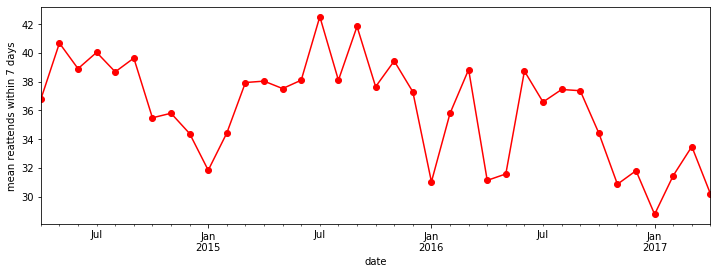

In [26]:
ax = train.plot(figsize=(12,4), color='red', marker='o', legend=False)
ax.set_ylabel('mean reattends within 7 days')

**Step 5: Create and fit Naive1, and SNaive baseline models**

* Hint: Fit the TRAINING data.

In [27]:
# your code here ...

In [40]:
model_1 = Naive1()
model_2 = SNaive(12)

In [42]:
model_1.fit(train)
model_2.fit(train)

**Step 6: Use each model to predict 6 months ahead**

* Hint.  You need to store the prediction results so that later on you can calculate the forecast error.

In [31]:
# your code here ...

In [44]:
preds_1 = model_1.predict(horizon=6)
preds_2 = model_2.predict(horizon=6)

**Step 7: Calculate the mean absolute error of each forecast method**
    
Based on the results which method would you choose?

In [33]:
# your code here ...

In [45]:
mae_1 = mean_absolute_error(y_true=test, y_pred=preds_1)
mae_2 = mean_absolute_error(y_true=test, y_pred=preds_2)

print(mae_1)
print(mae_2)

1.8876344086021497
7.152688172043011
